In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('average_perceptron_tagger')
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [5]:
data=pd.read_csv('Elon_musk.csv',encoding='Latin-1',error_bad_lines=False)
data

<ipython-input-5-8051469b688d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('Elon_musk.csv',encoding='Latin-1',error_bad_lines=False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
import re
def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    #text = emoji.replace_emoji(text, replace='')
    return text

In [8]:
data["Text"]=data["Text"].apply(cleaning)
data

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the n...
1995,ppathole make sure to read ur terms amp con...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f ...


In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['Text'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['Text'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data
data=lemm(data)

In [10]:
data

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with hd...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulation tesla china for amazing...
...,...
1994,flcnhvy true it sound so surreal but the negat...
1995,ppathole make sure to read ur term amp conditi...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f u f


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment and assign labels
def analyze_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)

    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each row in the DataFrame
data['Sentiment'] = data['Text'].apply(analyze_sentiment)

# Display the DataFrame with sentiment labels
print(data[['Text', 'Sentiment']])

                                                   Text Sentiment
0                                   kunalb i m an alien   Neutral
1     id aa carmack ray tracing on cyberpunk with hd...   Neutral
2                      joerogan spotify great interview  Positive
3                          gtera doge is underestimated  Negative
4     teslacn congratulation tesla china for amazing...  Positive
...                                                 ...       ...
1994  flcnhvy true it sound so surreal but the negat...  Negative
1995  ppathole make sure to read ur term amp conditi...  Positive
1996                  teslagong ppathole samwise gamgee   Neutral
1997          ppathole altho dumb and dumber is u f u f  Negative
1998                             progress update august  Positive

[1999 rows x 2 columns]


In [12]:
data

,Text,Sentiment
0,kunalb i m an alien,Neutral
1,id aa carmack ray tracing on cyberpunk with hd...,Neutral
2,joerogan spotify great interview,Positive
3,gtera doge is underestimated,Negative
4,teslacn congratulation tesla china for amazing...,Positive
...,...,...
1994,flcnhvy true it sound so surreal but the negat...,Negative
1995,ppathole make sure to read ur term amp conditi...,Positive
1996,teslagong ppathole samwise gamgee,Neutral
1997,ppathole altho dumb and dumber is u f u f,Negative


<Axes: xlabel='Sentiment', ylabel='count'>

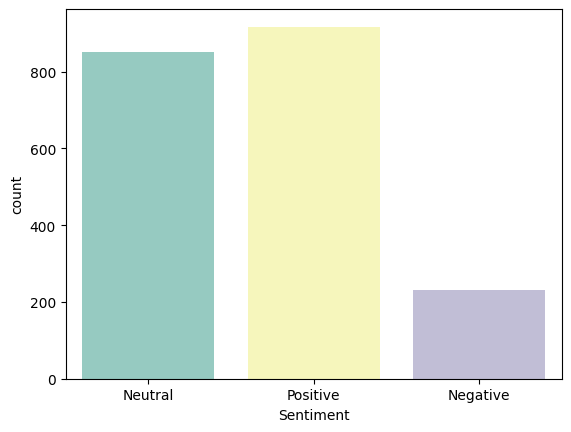

In [13]:
sns.countplot(x='Sentiment',data=data,palette="Set3")

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sentiment']=encoder.fit_transform(data['Sentiment'])
data

,Text,Sentiment
0,kunalb i m an alien,1
1,id aa carmack ray tracing on cyberpunk with hd...,1
2,joerogan spotify great interview,2
3,gtera doge is underestimated,0
4,teslacn congratulation tesla china for amazing...,2
...,...,...
1994,flcnhvy true it sound so surreal but the negat...,0
1995,ppathole make sure to read ur term amp conditi...,2
1996,teslagong ppathole samwise gamgee,1
1997,ppathole altho dumb and dumber is u f u f,0


Text(0.5, 1.0, 'Neutral Tweets')

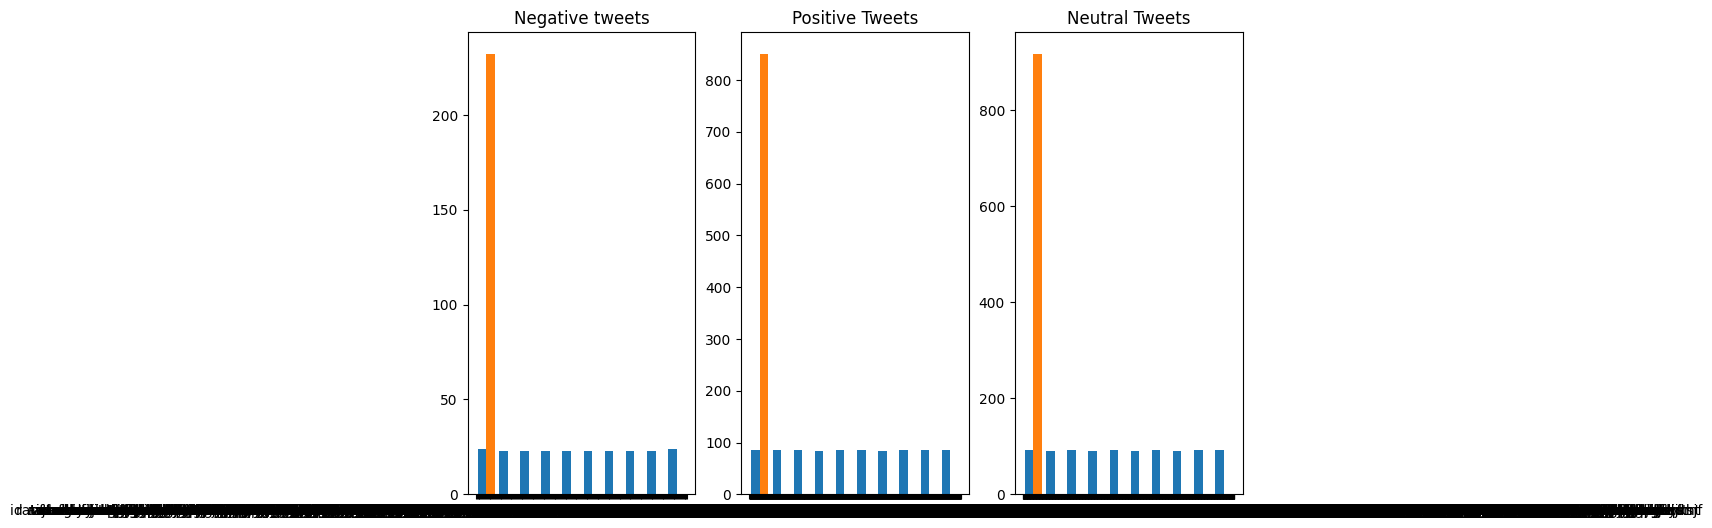

In [18]:
#1-->neutral,2-->postive,0-->negative
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,6))
tweet_len=data[data['Sentiment']==0]
ax1.hist(tweet_len)
ax1.set_title('Negative tweets')
tweet_len=data[data['Sentiment']==1]
ax2.hist(tweet_len)
ax2.set_title('Positive Tweets')
tweet_len=data[data['Sentiment']==2]
ax3.hist(tweet_len)
ax3.set_title('Neutral Tweets')

In [19]:
data

,Text,Sentiment
0,kunalb i m an alien,1
1,id aa carmack ray tracing on cyberpunk with hd...,1
2,joerogan spotify great interview,2
3,gtera doge is underestimated,0
4,teslacn congratulation tesla china for amazing...,2
...,...,...
1994,flcnhvy true it sound so surreal but the negat...,0
1995,ppathole make sure to read ur term amp conditi...,2
1996,teslagong ppathole samwise gamgee,1
1997,ppathole altho dumb and dumber is u f u f,0


In [22]:
removal=list(stopwords.words('english'))+list(punctuation)
stemmer=LancasterStemmer()
corpus=data['Text'].tolist()
print(len(corpus))

1999


In [23]:
final_corpus=[]
final_corpus_joined=[]
for i in data.index:
  text=re.sub('[^$a-zA-Z]',' ',data['Text'][i])
  text=text.lower()
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.split()
  lem=WordNetLemmatizer()
  lemmatizer=[lem.lemmatize(word) for word in text if not word in removal]
  text=' '.join(text)
  final_corpus.append(text)
  final_corpus_joined.append('text')

In [24]:
data_1=pd.DataFrame()
data_1['Text']=final_corpus_joined
data_1['Sentiment']=data['Sentiment'].values

In [25]:
data_2=pd.DataFrame()
data_2['Text']=final_corpus
data_2['Sentiment']=data['Sentiment'].values
data_2.head()

,Text,Sentiment
0,kunalb i m an alien,1
1,id aa carmack ray tracing on cyberpunk with hd...,1
2,joerogan spotify great interview,2
3,gtera doge is underestimated,0
4,teslacn congratulation tesla china for amazing...,2


In [26]:
#1-->neutral,2-->postive,0-->negative
pos=data_2[data_2['Sentiment']==2]
pos_list=pos['Text'].tolist()
neg=data_2[data_2['Sentiment']==0]
neg_list=neg['Text'].tolist()

In [27]:
pos_all=''.join([word for sent in pos_list for word in sent])
neg_all=''.join([word for sent in neg_list for word in sent])
print(pos_all)

joerogan spotify great interviewteslacn congratulation tesla china for amazing execution last year now on to the next for even morehappy new year of the ox http t co wfkmyu ojowensparks flcnhvy anonyx haha thanksflcnhvy anonyx indeed tweet definitely do not represent real world time allocationthe most entertaining outcome is the most likelyjust agree to do clubhouse with kanyewestjoshmanmode he definitely ha issue but the sentencing seems a bit highfreewalletorg thanks for fixingfreewalletorg please unlock my accountthis is true power haha http t co fc uhqsd ofreewalletorg any crypto wallet that won t give you your private key should be avoided at all costrt spacex nasa ha selected falcon heavy to launch the first two element of the lunar gateway together on one mission http t co pwtajtourville yesblkmdl rationaletienne adamklotz once we can predict cash flow reasonably well starlink will ipoxprize team will manage the m carbon capture prize http t co fsw ianl rmichaelgalanin kevinmgil

##Positive Word

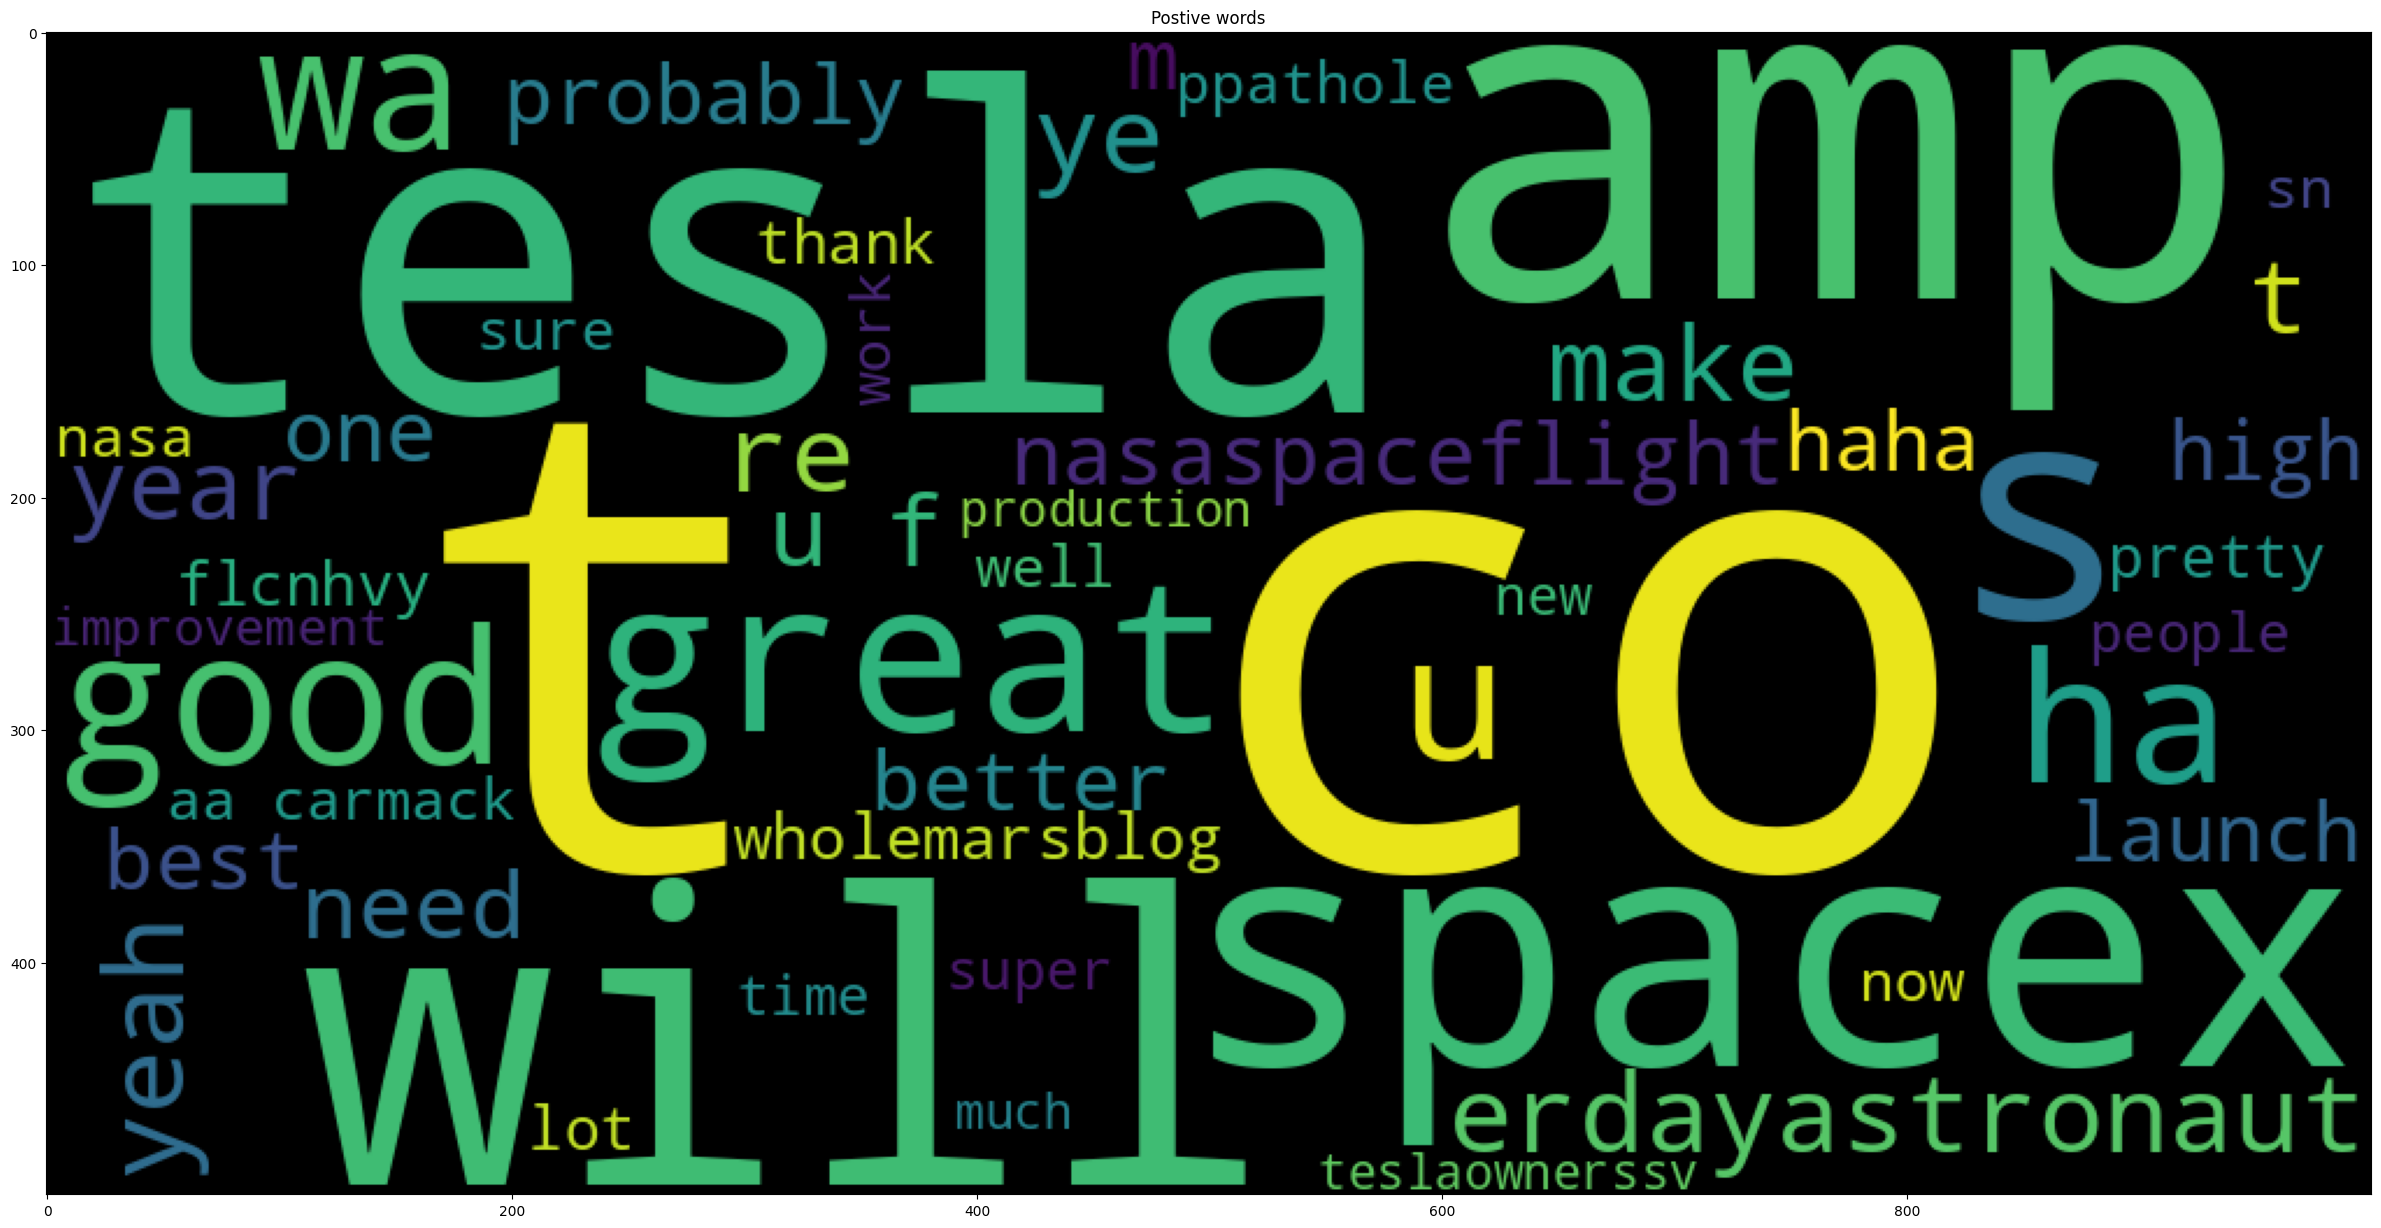

In [28]:
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=50,background_color='black').generate(pos_all)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud)
plt.title('Postive words')
plt.show()

##Negative Words

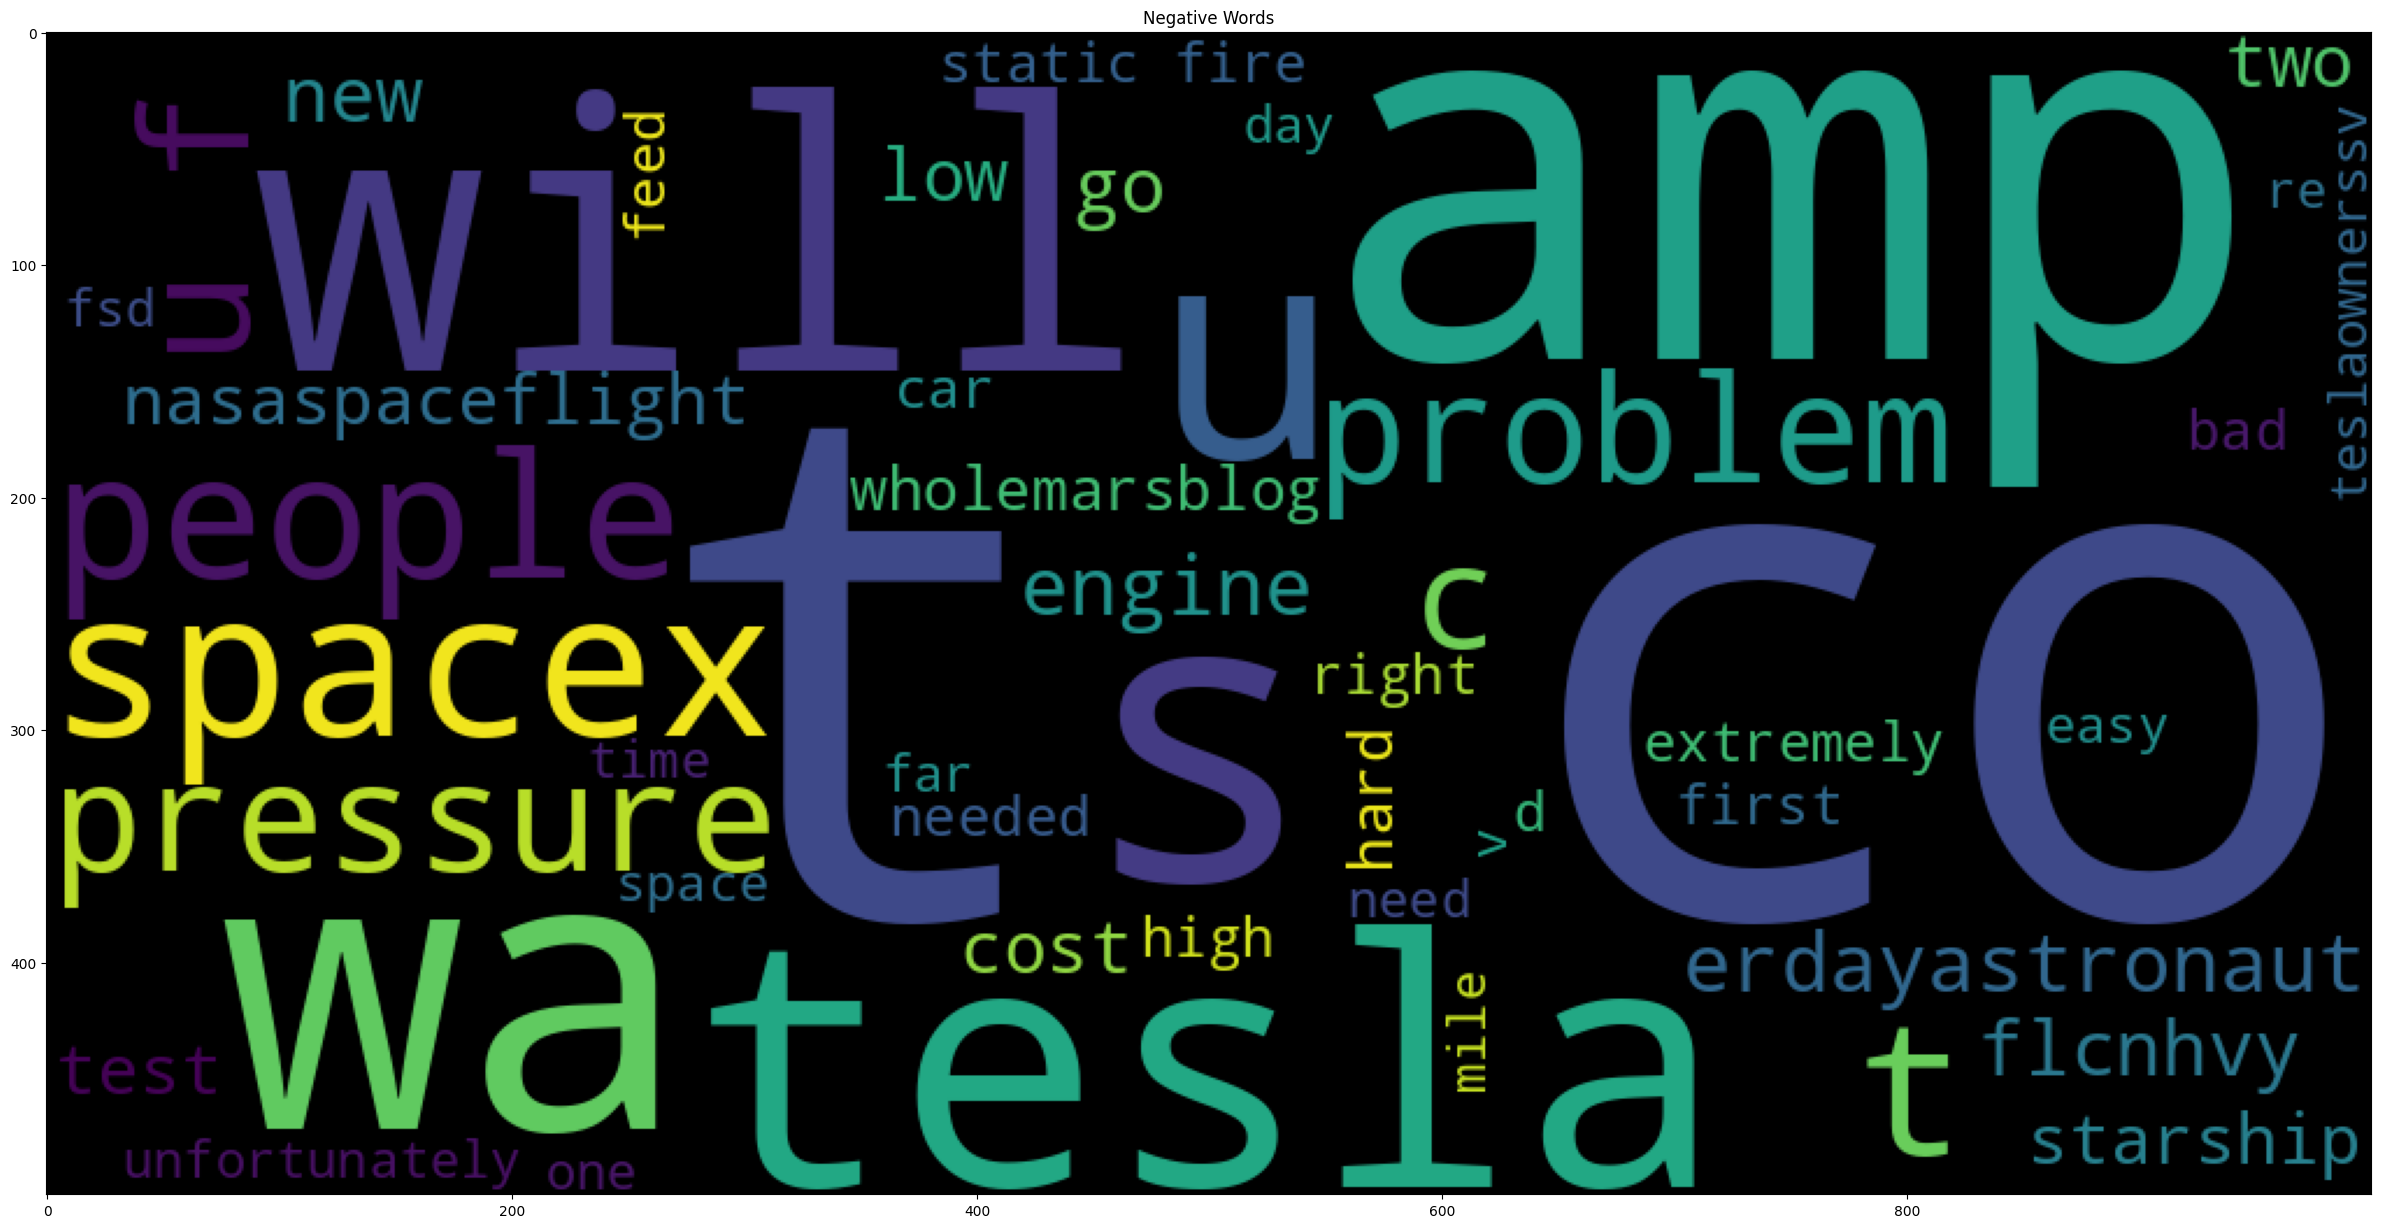

In [29]:
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=50,background_color='black').generate(neg_all)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud)
plt.title('Negative Words')
plt.show()

In [30]:
data

,Text,Sentiment
0,kunalb i m an alien,1
1,id aa carmack ray tracing on cyberpunk with hd...,1
2,joerogan spotify great interview,2
3,gtera doge is underestimated,0
4,teslacn congratulation tesla china for amazing...,2
...,...,...
1994,flcnhvy true it sound so surreal but the negat...,0
1995,ppathole make sure to read ur term amp conditi...,2
1996,teslagong ppathole samwise gamgee,1
1997,ppathole altho dumb and dumber is u f u f,0


Using machine learning algorithms

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x=tfid.fit_transform(data['Text'])
y=data['Sentiment']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print(accuracy_score(y_train,y_train_pred)*100)

90.80675422138836


#Decision Tree Algorithm

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

68.5


#Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

65.25


In [37]:
from sklearn.svm import LinearSVC
model=LinearSVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

77.25
